In [1]:
#Import the necessary libraries
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import math

In [2]:
#For running it on Google Colab
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

In [5]:
#just to make all random sequences on all computers the same.
np.random.seed(1)

In [6]:
#Checking the dataset
print(M)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sun Sep 13 17:50:05 2015', '__version__': '1.0', '__globals__': [], 'images_train': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'labels_train': array([[1],
       [3],
       [7],
       ...,
       [1],
       [6],
       [2]], dtype=uint8), 'images_test': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'labels_test': array([[8],
       [6],
       [5],
       ...,
       [0],
       [8],
       [5]], dtype=uint8)}


In [7]:
#randomly permute train data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]

In [8]:
#randomly permute test data points
inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

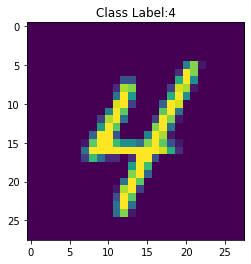

In [10]:
#show the 10'th train image
i=10
im = images_train[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_train[i][0]))
plt.show()

In [17]:
'''
Function that implements kNN for the task of predicting the class for a given test image
'''
def kNN(images_train, labels_train, images_test, labels_test, k):

  #Dictionary to track the total number of predictions made for each class
  per_class_overall_pred = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
  #Dictionary to track the total number of correct predictions made for each class
  per_class_num_correct_pred = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

  #Iterate over each test image
  for i in range(len(images_test)):
    #Calculate the Euclidean distance between the test image under consideration and all train images
    cal_distances = np.array([euclidean_distance(images_test[i], img_train) for img_train in images_train])
    #Sort the calculated distances
    sorted_cal_distance_idx = cal_distances.argsort()

    #To find k nearest neighbors' labels
    neighbor_labels = []
    for m in range(k):
      neighbor_labels.append(labels_train[sorted_cal_distance_idx[m]][0])

    #To predict the class of test image under consideration using majority voting
    pred_class = max(neighbor_labels, key = neighbor_labels.count)
    actual_class = labels_test[i][0]

    if pred_class == actual_class:
      #Increment the number of correct predictions for each class
      per_class_num_correct_pred[actual_class] += 1
    
    #Increment the total number of predictions for each class
    per_class_overall_pred[actual_class] += 1

  #Calculate per class accuracy
  acc = [0] * 10
  for key in per_class_overall_pred.keys():
    acc[key] = (per_class_num_correct_pred[key]/per_class_overall_pred[key]) * 100
  #Calculate average accuracy
  acc_av = (sum(per_class_num_correct_pred.values())/len(images_test)) * 100
  
  return acc, acc_av

In [12]:
'''
Function to find Euclidean distance between two data points
'''
def euclidean_distance(data_point1, data_point2):
  return np.sqrt(np.sum(np.square(data_point2 - data_point1)))

In [13]:
#To always consider only the first 1000 training images
images_test = images_test[0:1000,:]
labels_test = labels_test[0:1000,:]

Correct prediction


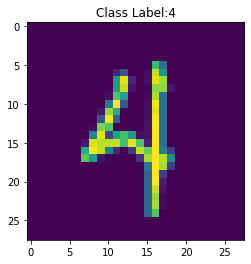

Incorrect prediction


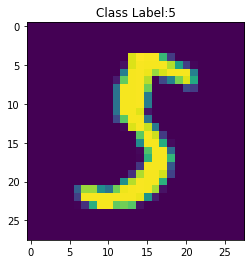

Per class accuracy = [98.05825242718447, 100.0, 79.7979797979798, 86.08695652173914, 79.3103448275862, 67.02127659574468, 93.02325581395348, 87.93103448275862, 76.28865979381443, 82.35294117647058]
Avergae accuracy = 85.2


In [14]:
#Checking the implemented knn function for 500 train images, 1000 test images, and k=5
acc, acc_av = kNN(images_train[0:500,:], labels_train[0:500,:], images_test, labels_test, 5)
print("Per class accuracy = "+str(acc))
print("Avergae accuracy = "+str(acc_av))

# Question 7 (c) 

For k = 1, change the number of training data points (30 to 10,000) to see the change in performance. Plot the average accuracy for 10 different dataset sizes. You may use command logspace in Matlab. In the plot, x-axis is for the number of training data and y-axis is for the accuracy

Calculating accuracy for train data of size 30 ...
Calculating accuracy for train data of size 57 ...
Calculating accuracy for train data of size 109 ...
Calculating accuracy for train data of size 208 ...
Calculating accuracy for train data of size 398 ...
Calculating accuracy for train data of size 758 ...
Calculating accuracy for train data of size 1445 ...
Calculating accuracy for train data of size 2754 ...
Calculating accuracy for train data of size 5248 ...
Calculating accuracy for train data of size 10000 ...


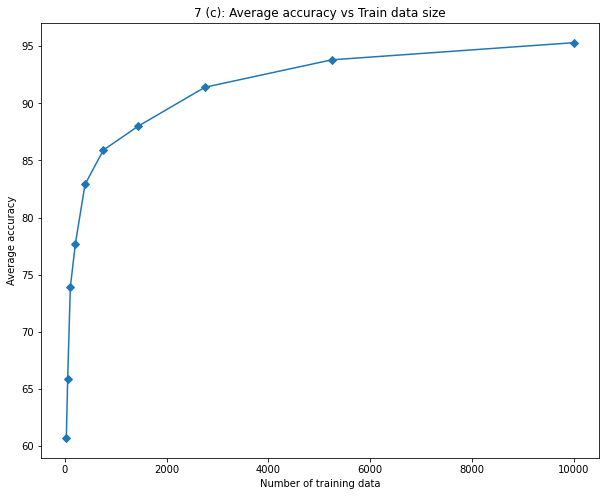

In [19]:
acc_av_train_data_size = []
#Extracting 10 differnt data sizes in the range of [30-10000]
train_data_size = np.logspace(1.48, 4, num=10, dtype=int)

#Iterating over 10 differnt data sizes and calculating the accuracy
for i in train_data_size:
  print("Calculating accuracy for train data of size " + str(i) + " ...")
  acc, acc_av = kNN(images_train[0:i,:], labels_train[0:i,:], images_test, labels_test, 1)
  acc_av_train_data_size.append(acc_av)

#Plotting
plt.figure(figsize=(10, 8))
plt.plot(train_data_size, acc_av_train_data_size, marker='D')
plt.xlabel("Number of training data")
plt.ylabel("Average accuracy")
plt.title("7 (c): Average accuracy vs Train data size")
plt.show()

# Question 7 (d)

Show the effect of k on the accuracy. Make a plot similar to the above one with multiple colored curves on the top of each other (each for a particular k in [1 2 3 5 10].) You may use command legend in Matlab to name different colors.

Calculating accuracies for k=1 ...
Calculating accuracies for k=2 ...
Calculating accuracies for k=3 ...
Calculating accuracies for k=5 ...
Calculating accuracies for k=10 ...


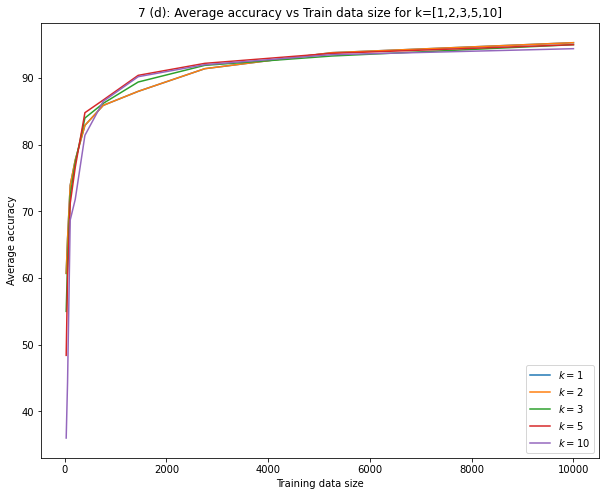

In [20]:
#Extracting 10 differnt data sizes in the range of [30-10000]
train_data_size = np.logspace(1.48, 4, num=10, dtype=int)

plt.figure(figsize=(10, 8))

#Iterating over different values of k
for k in [1,2,3,5,10]:
  print("Calculating accuracies for k="+str(k)+" ...")
  acc_av_train_data_size = [] 
  
  #Iterating over 10 differnt data sizes and calculating the accuracy
  for i in train_data_size:
    acc, acc_av = kNN(images_train[0:i,:], labels_train[0:i,:], images_test, labels_test, k)
    acc_av_train_data_size.append(acc_av)
  plt.plot(train_data_size, acc_av_train_data_size, label='$k = {k}$'.format(k=k))

plt.legend()
plt.xlabel("Training data size")
plt.ylabel("Average accuracy")
plt.title("7 (d): Average accuracy vs Train data size for k=[1,2,3,5,10]")
plt.show()

# Question 7 (e) 

Choose the best k. First choose 2,000 training data randomly (to speed up the experiment). Then, split the training data randomly to two halves (the first for training and the second for cross-validation to choose the best k). Please plot the average accuracy wrt k on the validation set. You may search for k in this list: [1 2 3 5 10]. Finally, report the accuracy for the best k on the testing data.

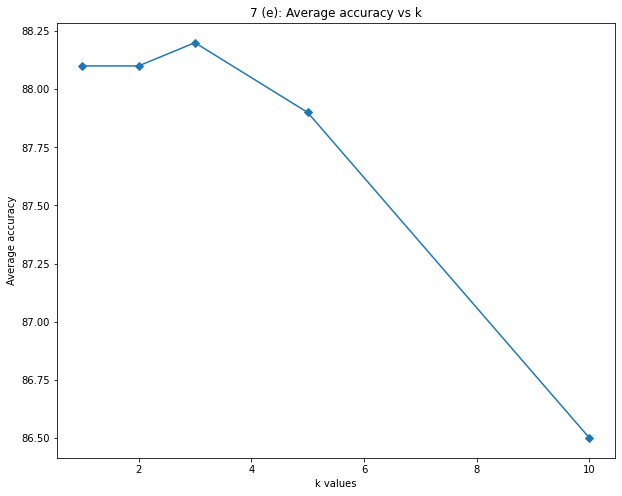

In [21]:
#To randomly permute all train images
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]

#Choose 2000 trainig data
training_data = images_train[0:2000,:]
training_data_labels = labels_train[0:2000,:]

#Splitting the training data into train data and validation data
train_data = training_data[0:1000,:]
train_data_labels = training_data_labels[0:1000,:]
validation_data = training_data[1000:2000,:]
validation_data_labels = training_data_labels[1000:2000,:]

k_values = [1,2,3,5,10]
acc_av_values = []

#Iterating over differnt values of k and calculating the acccuracy 
for k in k_values:
  acc, acc_av = kNN(train_data, train_data_labels, validation_data, validation_data_labels, k)
  acc_av_values.append(acc_av)

#Plotting
plt.figure(figsize=(10, 8))
plt.plot(k_values, acc_av_values, marker='D')
plt.xlabel("k values")
plt.ylabel("Average accuracy")
plt.title("7 (e): Average accuracy vs k")
plt.show()


In [22]:
#Calculating the accuracy for the best k on the testing data.
acc, acc_av = kNN(training_data, training_data_labels, images_test, labels_test, 3)
print("Accuracy for the best k on testing data: "+str(acc_av))

Accuracy for the best k on testing data: 91.4
